In [4]:
import torch
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from transformers import AutoModel, AutoTokenizer
from torch.utils.data import DataLoader
from cluster_statistic import cluster_statistic
import utils as clustering_utils
import matplotlib.pyplot as plt

/home/mamooler/miniconda3/envs/text_active_labeling/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
device = torch.device('cuda:5')
root_dir = "../data/available_datasets/"
data_dir = "contract_nli/train.csv" #"privacy_policy/hard_label_train_opp115.csv"
meta_data_dir = "contract_nli/train_meta_data.csv"
class_names = pd.read_csv(root_dir+meta_data_dir)['label'].tolist()
dataframe = pd.read_csv(root_dir+data_dir, sep=',', header=0)
label2id = {}
cls_id = 0
for cls in class_names:
    label2id[cls] = cls_id
    cls_id += 1

output_dir = "contract_nli/normalized/"

# for i,l in enumerate(dataframe["label"]):
#     dataframe["label"][i] = label2id[l]
print(len(dataframe))


4371


In [13]:
model_path = "/mnt/nlp4sd/mamooler/checkpoints/domain_adaptation/output/contract-nli/model-distillation-10epochs-2022-06-18_14-11-39" #"/mnt/localdata/mamooler/text_act_lab/domain_adaptation/output/model-distillation-2021-09-23_14-05-39"
bi_encoder = SentenceTransformer(model_path, device=device)   
method = "distilled"

silhouette_indices = []
average_clutser_size = [5, 10, 20, 50]
k_range  = average_clutser_size #[len(dataframe)//size for size in average_clutser_size]

You try to use a model that was created with version 2.2.0, however, your version is 2.0.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





In [4]:

distill_results = {}
count_cat_nb_cluster_map = {}
for k in k_range:
    cat_cluster_map = clustering_utils.kmeans_cluster(bi_encoder, dataframe, k, output_dir, method=method)
    # data = pd.read_csv(output_dir+"clusters/"+method+f"_{k}-clusters.csv")
    for cat, nb_clusters in cat_cluster_map.items():
        cluster_path = output_dir+"/clusters/"+f"{cat}-{method}"+f"_{nb_clusters}-clusters.csv"
        cluster_stats = cluster_statistic(cluster_path)
        count_cat_nb_cluster_map[(k, cat)] = nb_clusters

read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv f

In [5]:
model_path = "/mnt/nlp4sd/mamooler/checkpoints/domain_adaptation/res/contract_nli/" #"/mnt/localdata/mamooler/text_act_lab/domain_adaptation/output/model-distillation-2021-09-23_14-05-39"
bi_encoder = SentenceTransformer(model_path, device=device)   
method = "adapted"

silhouette_indices = []
average_clutser_size = [5, 10, 20, 50]
k_range  = average_clutser_size #[len(dataframe)//size for size in average_clutser_size]

Some weights of the model checkpoint at /mnt/nlp4sd/mamooler/checkpoints/domain_adaptation/res/contract_nli/ were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at /mnt/nlp4sd/mamooler/checkpoints/domain_adaptation/res/contract_nli/ and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this 

In [6]:
for k in k_range:
    cat_cluster_map = clustering_utils.kmeans_cluster(bi_encoder, dataframe, k, output_dir, method=method)
    # data = pd.read_csv(output_dir+"clusters/"+method+f"_{k}-clusters.csv")
    for cat, nb_clusters in cat_cluster_map.items():
        cluster_path = output_dir+"/clusters/"+f"{cat}-{method}"+f"_{nb_clusters}-clusters.csv"
        cluster_stats = cluster_statistic(cluster_path)

read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv f

In [17]:
cat_nb_cluster_map = {
    "Survival of obligations": 6,
    "Permissible copy": 3,
    "No reverse engineering":3,
    "No solicitation": 4,
    "Explicit identification": 4,
    "Permissible acquirement of similar information": 6,
    "Return of confidential information": 3,
    "Inclusion of verbally conveyed information": 5,
    "No licensing": 6,
    "Sharing with third-parties": 7,
    "None-inclusion of non-technical information": 6,
    "Permissible post-agreement possession": 6,
    "Permissible development of similar information": 5,
    "Sharing with employees": 7,
    "Limited use": 7,
    "Notice on compelled disclosure": 5,
    "Confidentiality of Agreement": 3
}
for cat, nb_clusters in cat_nb_cluster_map.items():
    plt.clf()
    distill_dunn = np.load(open(output_dir+f"stats/{cat}-distilled"+f"_{nb_clusters}-clusters_dunn.npz", 'rb'))
    adapted_dunn = np.load(open(output_dir+f"stats/{cat}-adapted"+f"_{nb_clusters}-clusters_dunn.npz", 'rb'))
    distill_avg_dunn = np.mean(distill_dunn)
    adapt_avg_dunn = np.mean(adapted_dunn)
    # print(f"{cat}, {nb_clusters}, distill: {distill_avg_dunn}, adapat: {adapt_avg_dunn}")
    plt.hist(distill_dunn, alpha=0.5, label="DisTAPT RoBERTa")
    plt.hist(adapted_dunn, alpha=0.5, label="TAPT RoBERTa")
    plt.xlabel("Dunn Index", size=20)
    plt.ylabel("Count", size=20)
    plt.title(f"{cat}, {nb_clusters} clusters", size=20)
    plt.legend(loc='upper right')
    plt.savefig(output_dir+"/clusters/"+f"{cat}_{nb_clusters}-clusters-dunn-histogram.png")
    

In [5]:
device = torch.device('cuda:5')
root_dir = "../data/available_datasets/"
data_dir = "ledgar/train.csv" #"privacy_policy/hard_label_train_opp115.csv"
meta_data_dir = "ledgar/train_stat.csv"
class_names = pd.read_csv(root_dir+meta_data_dir)['label'].tolist()
dataframe = pd.read_csv(root_dir+data_dir, sep=',', header=0)
label2id = {}
cls_id = 0
for cls in class_names:
    label2id[cls] = cls_id
    cls_id += 1

output_dir = "ledgar/normalized/"

# for i,l in enumerate(dataframe["label"]):
#     dataframe["label"][i] = label2id[l]
print(len(dataframe))

44249


In [7]:
model_path = "/mnt/nlp4sd/mamooler/checkpoints/domain_adaptation/output/ledgar/model-distillation-10epochs-2022-06-14_19-59-01" #"/mnt/localdata/mamooler/text_act_lab/domain_adaptation/output/model-distillation-2021-09-23_14-05-39"
bi_encoder = SentenceTransformer(model_path, device=device)   
method = "distilled"

silhouette_indices = []
average_clutser_size = [50, 100, 200]
k_range  = [len(dataframe)//size for size in average_clutser_size]

You try to use a model that was created with version 2.2.0, however, your version is 2.0.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





In [10]:
count_cat_nb_cluster_map = {}
for k in k_range:
    cat_cluster_map = clustering_utils.kmeans_cluster(bi_encoder, dataframe, k, output_dir, method=method)
    # data = pd.read_csv(output_dir+"clusters/"+method+f"_{k}-clusters.csv")
    for cat, nb_clusters in cat_cluster_map.items():
        cluster_path = output_dir+"/clusters/"+f"{cat}-{method}"+f"_{nb_clusters}-clusters.csv"
        cluster_stats = cluster_statistic(cluster_path)
        count_cat_nb_cluster_map[(k, cat)] = nb_clusters

read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings


In [11]:
model_path = "/mnt/nlp4sd/mamooler/checkpoints/domain_adaptation/res/ledgar/" #"/mnt/localdata/mamooler/text_act_lab/domain_adaptation/output/model-distillation-2021-09-23_14-05-39"
bi_encoder = SentenceTransformer(model_path, device=device)   
method = "adapted"

silhouette_indices = []
average_clutser_size = [50, 100, 200]
k_range  = [len(dataframe)//size for size in average_clutser_size]

Some weights of the model checkpoint at /mnt/nlp4sd/mamooler/checkpoints/domain_adaptation/res/ledgar/ were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at /mnt/nlp4sd/mamooler/checkpoints/domain_adaptation/res/ledgar/ and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a d

In [12]:
for k in k_range:
    cat_cluster_map = clustering_utils.kmeans_cluster(bi_encoder, dataframe, k, output_dir, method=method)
    # data = pd.read_csv(output_dir+"clusters/"+method+f"_{k}-clusters.csv")
    for cat, nb_clusters in cat_cluster_map.items():
        cluster_path = output_dir+"/clusters/"+f"{cat}-{method}"+f"_{nb_clusters}-clusters.csv"
        cluster_stats = cluster_statistic(cluster_path)

read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings
read csv file
loaded centers
loading embeddings
loaded embeddings


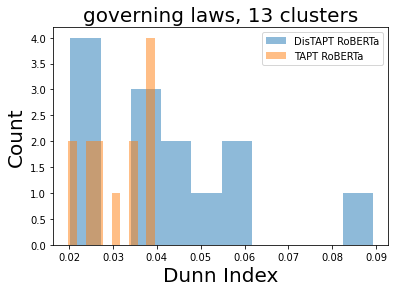

In [10]:
cat_nb_cluster_map = {
    "amendments": 10,
    "counterparts": 9,
    "entire agreements":9,
    "notices": 7,
    "governing laws": 13
}
for cat, nb_clusters in cat_nb_cluster_map.items():
    plt.clf()
    distill_dunn = np.load(open(output_dir+f"stats/{cat}-distilled"+f"_{nb_clusters}-clusters_dunn.npz", 'rb'))
    adapted_dunn = np.load(open(output_dir+f"stats/{cat}-adapted"+f"_{nb_clusters}-clusters_dunn.npz", 'rb'))
    distill_avg_dunn = np.mean(distill_dunn)
    adapt_avg_dunn = np.mean(adapted_dunn)
    # print(f"{cat}, {nb_clusters}, distill: {distill_avg_dunn}, adapat: {adapt_avg_dunn}")
    plt.hist(distill_dunn, alpha=0.5, label="DisTAPT RoBERTa")
    plt.hist(adapted_dunn, alpha=0.5, label="TAPT RoBERTa")
    plt.xlabel("Dunn Index", size=20)
    plt.ylabel("Count", size=20)
    plt.title(f"{cat}, {nb_clusters} clusters", size=20)
    plt.legend(loc='upper right')
    plt.savefig(output_dir+"/clusters/"+f"{cat}_{nb_clusters}-clusters-dunn-histogram.png")
    

In [9]:
cat_nb_cluster_map = {
    "amendments": 10,
    "counterparts": 9,
    "entire agreements":9,
    "notices": 7,
    "governing laws": 13
}


axis = []

i = 0
for cat, nb_clusters in cat_nb_cluster_map.items():
    plt.clf()
    
    distill_dunn = np.load(open(output_dir+f"stats/{cat}-distilled"+f"_{nb_clusters}-clusters_dunn.npz", 'rb'))
    adapted_dunn = np.load(open(output_dir+f"stats/{cat}-adapted"+f"_{nb_clusters}-clusters_dunn.npz", 'rb'))
    distill_avg_dunn = np.mean(distill_dunn)
    adapt_avg_dunn = np.mean(adapted_dunn)
    ax = sns.histplot(data=distill_dunn, palette="flare", legend=True)#, label=f'{df_name}')
    ax1 = sns.histplot(data=adapted_dunn, palette="flare", legend=True)#, label=f'{df_name}')
    # ax.set_xticks([20, 30, 40, 50, 60])
    ax.set_xlabel("Dunn Index", fontsize = 20.0)
    axis.append(ax)
    axis.append(ax1)
    ax.set_ylabel("Count", fontsize = 20.0)
    ax.set_title(f"{cat}, {nb_clusters} clusters", fontsize = 20.0)
    # print(f"{cat}, {nb_clusters}, distill: {distill_avg_dunn}, adapat: {adapt_avg_dunn}")
    # plt.hist(distill_dunn, alpha=0.5, label="DisTAPT RoBERTa")
    # plt.hist(adapted_dunn, alpha=0.5, label="TAPT RoBERTa")
    # plt.xlabel("Dunn Index", size=20)
    # plt.ylabel("Count", size=20)
    # plt.title(f"{cat}, {nb_clusters} clusters", size=20)
    # plt.legend(loc='upper right')
    plt.savefig(output_dir+"/clusters/"+f"{cat}_{nb_clusters}-clusters-dunn-histogram.png")

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, title="")
    plt.subplots_adjust(bottom=0.2)
    # plt.savefig(os.path.join(output_path, f"{dataset}_{cat_name}.pdf"), dpi=1200)
    plt.savefig(output_dir+"/clusters/"+f"{cat}_{nb_clusters}-clusters-dunn-histogram.pdf")
    plt.clf()

/tmp/ipykernel_29232/3850584833.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=distill_dunn, palette="flare", legend=True)#, label=f'{df_name}')
/tmp/ipykernel_29232/3850584833.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax1 = sns.histplot(data=adapted_dunn, palette="flare", legend=True)#, label=f'{df_name}')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_29232/3850584833.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=distill_dunn, palette="flare", legend=True)#, label=f'{df_name}')
/tmp/ipykernel_29232/3850584833.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax1 = sns.histplot(data=adapted_dunn, palette="flare", legend=True)#, label=f'{df_name}')
No artists wi

<Figure size 432x288 with 0 Axes>